In [1]:
#import the libraries needed 

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [2]:
#Set fast run equal to false
FAST_RUN = False

#Set the image width as 128 pixels
IMAGE_WIDTH=128

#Set the image height as 128 pixels
IMAGE_HEIGHT=128

#Set the image size as 128x128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

#Set the image channels as 3
IMAGE_CHANNELS=3

In [3]:
#Open the files in the Training Set
filenames = os.listdir(r"C:\Users\nguyent2\Desktop\Training")

#Initiate an empty list of the categories
categories = []

#Loop through all of the files in the Training Set
for filename in filenames:
    
    #Get category equals to the first character in the filename
    category = filename[0]
    
    #Set the images into the correct labels
    if category == "3":
        categories.append("triangle")
    elif category == "4":
        categories.append("square")
    elif category == "5":
        categories.append("pentagon")
    elif category == "6":
        categories.append("hexagon")
    elif category == "7":
        categories.append("heptagon")
    elif category == "8":
        categories.append("octagon")
    elif category == "9":
        categories.append("nonagon")
    else:
        categories.append("decagon")

#Creating the .csv file with the filename and category
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

#This line is used to shuffle the dataframe
df = df.sample(frac=1)

In [4]:
# #Export the .csv file to check the images with the labels
# df.to_csv(r"C:\Users\nguyent2\Desktop\New.csv")

# #Check the head()
# df.head()

In [5]:
# #Check the tail()
# df.tail()

<AxesSubplot:>

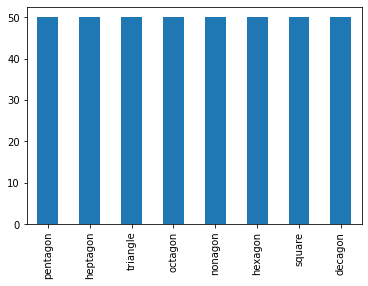

In [6]:
#Plot the number of images in each label in the training set
df['category'].value_counts().plot.bar()

In [7]:
# #Randomly pick 1 image
# sample = random.choice(filenames)

# #Load the image to check the image
# image = load_img(r"C:\Users\nguyent2\Desktop\Training\\" + sample)

# #Show the image
# plt.imshow(image)

In [8]:
#In the training set, splitting the images into 2 smaller dataframes, which are train_df and validate_df 
#with a ratio of 8:2
#This means 80% of the training set is in train_df, 20% of the training set is in validate_df
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)

#Drop the index of the training_df
train_df = train_df.reset_index(drop=True)

#Drop the index of the validate_df
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

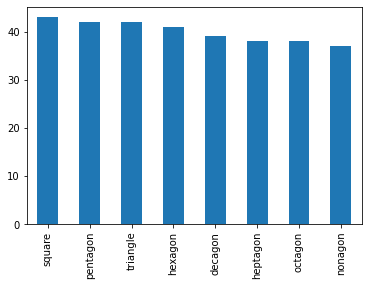

In [9]:
#Plot the number of images in train_df
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

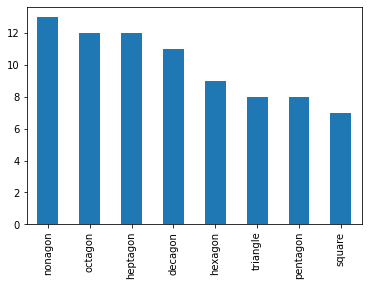

In [10]:
#Plot the number of images in the validate_df
validate_df['category'].value_counts().plot.bar()

In [11]:
#Set batch size, total train and total validate
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=10

In [12]:
#Rotate the image in 15 different rotations, rescale - which means to normalize the image
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

#Get the train_generator
train_generator = train_datagen.flow_from_dataframe(
    train_df, r"C:\Users\nguyent2\Desktop\Training", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size= batch_size
)

Found 320 validated image filenames belonging to 8 classes.


In [13]:
#Get the validation_generator after normalizing the image
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r"C:\Users\nguyent2\Desktop\Training", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 80 validated image filenames belonging to 8 classes.


In [14]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,   r"C:\Users\nguyent2\Desktop\Training", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


In [15]:
# plt.figure(figsize=(128, 128))
# for i in range(0, 15):
#     plt.subplot(5, 3, i+1)
#     for X_batch, Y_batch in example_generator:
#         image = X_batch[0]
#         plt.imshow(image)
#         break
# plt.tight_layout()
# plt.show()

In [16]:
model = Sequential()

model.add(Conv2D(12 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))

model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(24 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))

model.add(Dropout(0.3))

model.add(Dense(units = 8 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 12)      336       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 12)      48        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 24)        2616      
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 24)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 24)        96        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 24)        0

In [17]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [18]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=[early_stop]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
32/32 [==============================] - 7s 231ms/step - loss: 8.3095 - accuracy: 0.1437 - val_loss: 3.0297 - val_accuracy: 0.0875
Epoch 2/50
32/32 [==============================] - 7s 219ms/step - loss: 2.4387 - accuracy: 0.1500 - val_loss: 5.8239 - val_accuracy: 0.0875
Epoch 3/50
32/32 [==============================] - 7s 218ms/step - loss: 2.0892 - accuracy: 0.1531 - val_loss: 7.2439 - val_accuracy: 0.0875


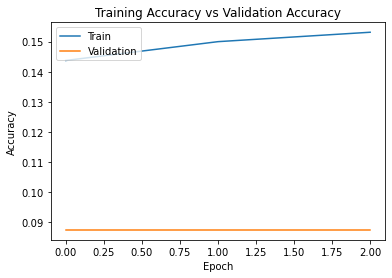

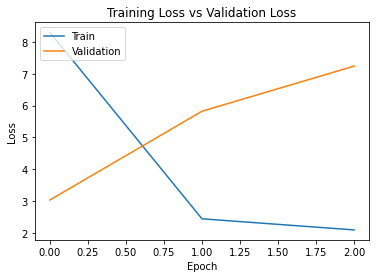

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
test_filenames = os.listdir(r"C:\Users\nguyent2\Desktop\Testing")

test_df = pd.DataFrame({
    'filename': test_filenames
})
test_df = test_df.sample(frac=1)

nb_samples = test_df.shape[0]

In [29]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r"C:\Users\nguyent2\Desktop\Testing", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 40 validated image filenames.


In [30]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [31]:
test_df['category'] = np.argmax(predict, axis=-1)

In [32]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df.to_csv(r"C:\Users\nguyent2\Desktop\New_2.csv")

<AxesSubplot:>

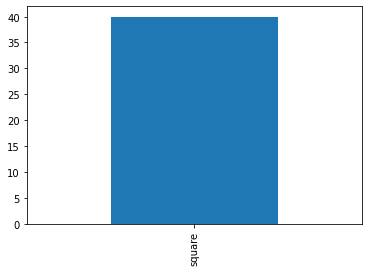

In [33]:
test_df['category'].value_counts().plot.bar()

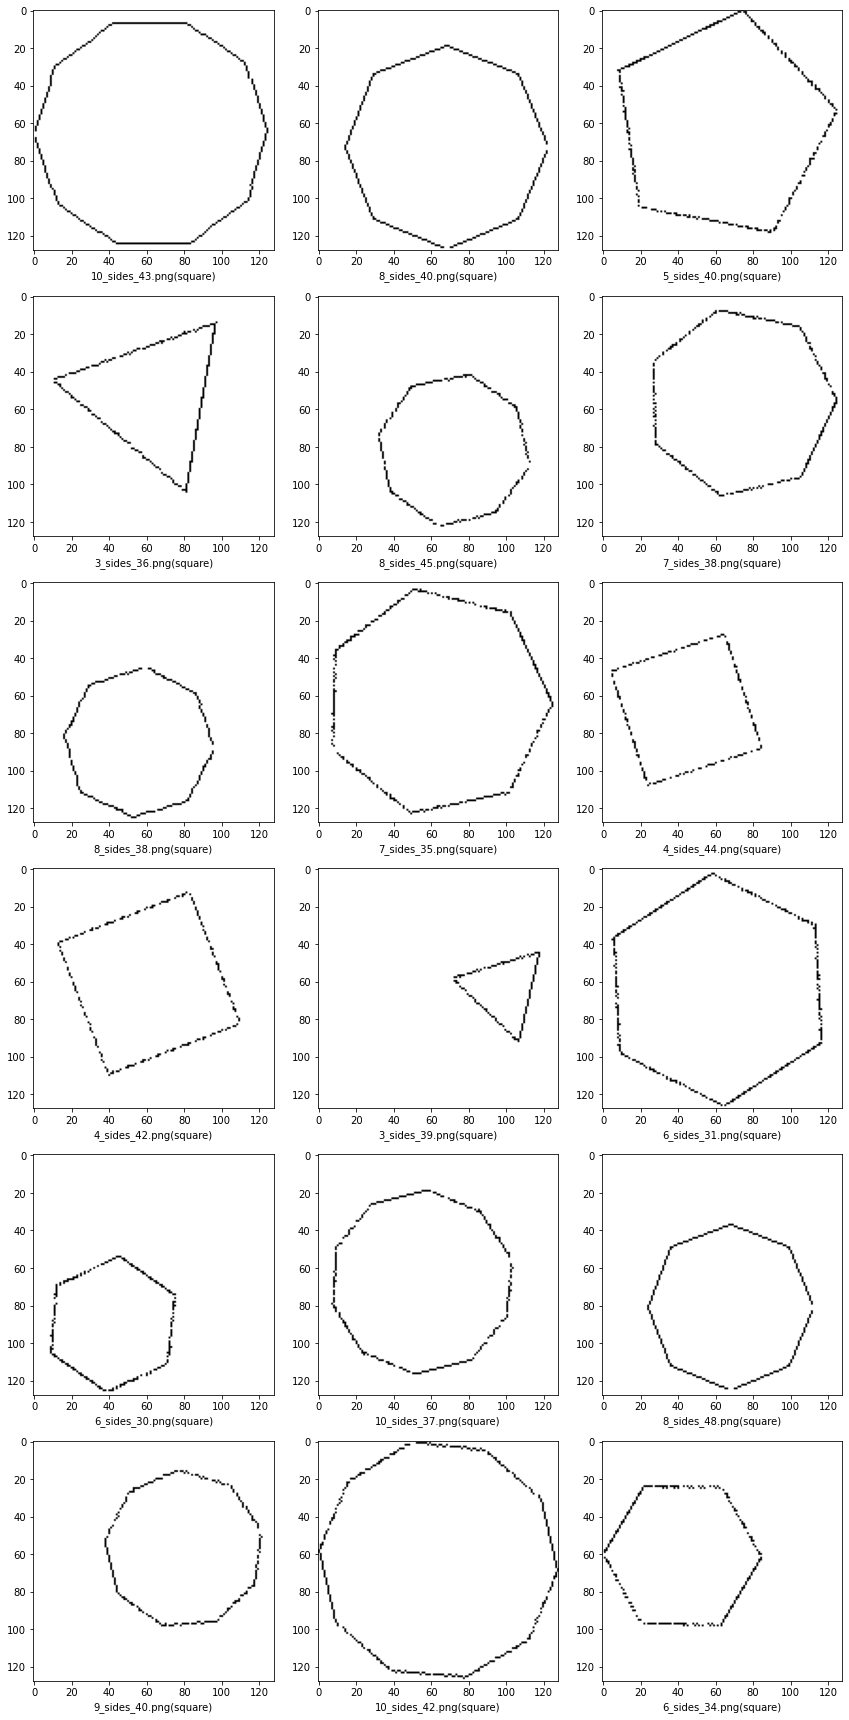

In [26]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
i = 0
for index, row in sample_test.iterrows():
    i +=1
    filename = row['filename']
    category = row['category']
    img = load_img(r"C:\Users\nguyent2\Desktop\Testing\\"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, i)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()